Dissolved Carbon: Mean = 18.39, Median = 18.00, Standard Deviation = 5.07
Chlorophyll a: Mean = 5.83, Median = 2.95, Standard Deviation = 8.46


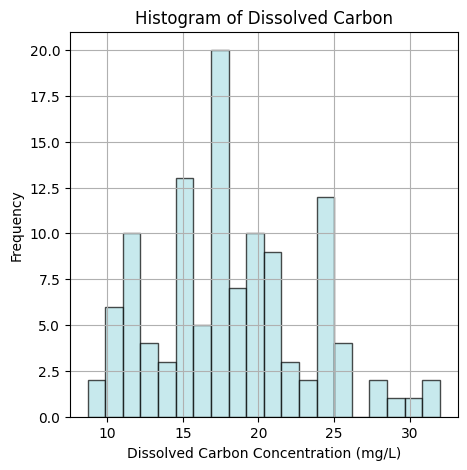

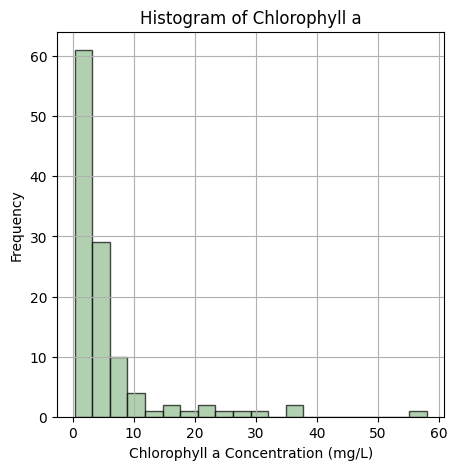

Pearson Correlation Coefficient: -0.05
Spearman Correlation Coefficient: 0.06


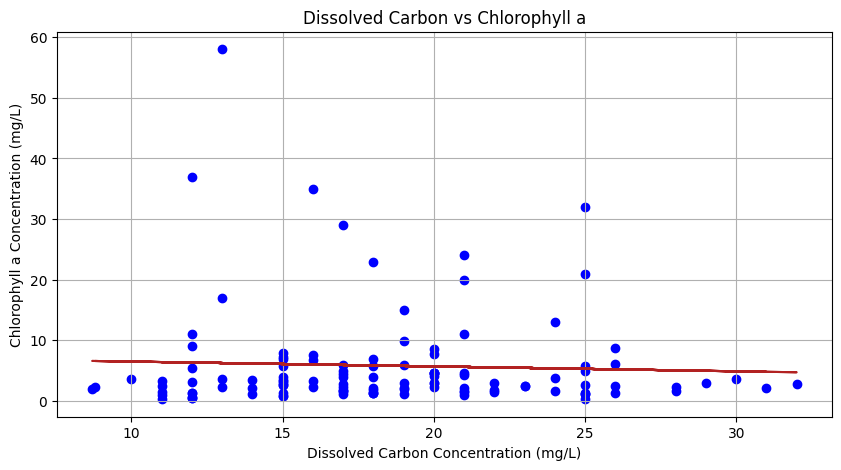

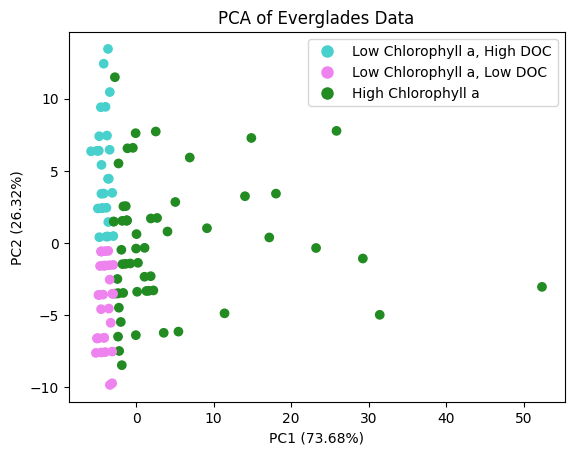

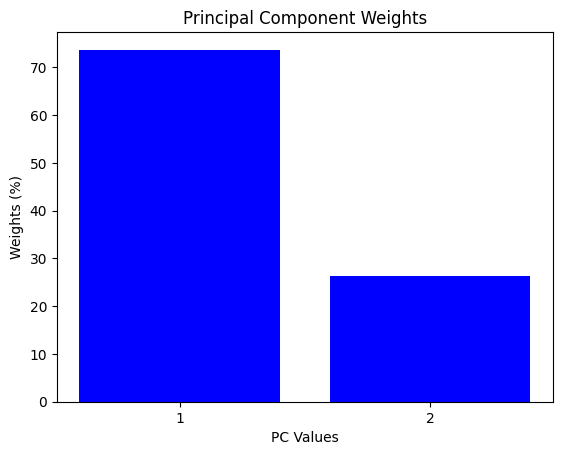

In [1]:
#Part 1
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA


file = open("macchiakassandraeverglades.csv", "r") #open the file
first = True

lol = [] #creating empty list of lists

for line in file:
    if first == True:
        header = line.strip().split(",") #splitting the header line by comma (CSV file)
        first = False
    else: 
        data = line.strip().split(",")
        edited_data = [float(value) for value in data[1:]] #converting the numerical data to floats
        lol.append(edited_data) #appending numerical data to list of lists

data = np.array(lol) #converting list of lists to numpy array

#extracting the relevant columns (dissolved carbon and chlorophyll a)
dissolved_carbon = data[:, 0]
chlorophyll_a = data[:, 1]

#calculating mean, median, and standard deviation for dissolved carbon
mean_dissolved_carbon = np.mean(dissolved_carbon)
median_dissolved_carbon = np.median(dissolved_carbon)
std_dissolved_carbon = np.std(dissolved_carbon)

#calculating mean, median, and standard deviation for chlorophyll a
mean_chlorophyll_a = np.mean(chlorophyll_a)
median_chlorophyll_a = np.median(chlorophyll_a)
std_chlorophyll_a = np.std(chlorophyll_a)

#printing the results
print(f'Dissolved Carbon: Mean = {mean_dissolved_carbon:.2f}, Median = {median_dissolved_carbon:.2f}, Standard Deviation = {std_dissolved_carbon:.2f}')
print(f'Chlorophyll a: Mean = {mean_chlorophyll_a:.2f}, Median = {median_chlorophyll_a:.2f}, Standard Deviation = {std_chlorophyll_a:.2f}')

#Part 2: Creating histograms for dissolved carbon and chlorophyll a

#creating a histogram for dissolved carbon
plt.figure(figsize=(5, 5))
plt.hist(dissolved_carbon, bins=20, color='powderblue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Dissolved Carbon')
plt.xlabel('Dissolved Carbon Concentration (mg/L)')
plt.ylabel('Frequency')
plt.grid(True)

#showing the histogram
plt.show()

#creating a histogram for chlorophyll a
plt.figure(figsize=(5, 5))
plt.hist(chlorophyll_a, bins=20, color='darkseagreen', alpha=0.7, edgecolor='black')
plt.title('Histogram of Chlorophyll a')
plt.xlabel('Chlorophyll a Concentration (mg/L)')
plt.ylabel('Frequency')
plt.grid(True)

#showing the histogram
plt.show()

#Part 2: Calculating Pearson and Spearman Correlation Coefficients
pearson_corr, _ = stats.pearsonr(dissolved_carbon, chlorophyll_a)
spearman_corr, _ = stats.spearmanr(dissolved_carbon, chlorophyll_a)

print(f'Pearson Correlation Coefficient: {pearson_corr:.2f}')
print(f'Spearman Correlation Coefficient: {spearman_corr:.2f}')

#linear regression
#Calculating the mean of x and y
mean_x = np.mean(dissolved_carbon)
mean_y = np.mean(chlorophyll_a)

#Calculating the terms needed for the numerator and denominator of the slope 
numerator = np.sum((dissolved_carbon - mean_x) * (chlorophyll_a - mean_y))
denominator = np.sum((dissolved_carbon - mean_x) ** 2)

#Calculating the slope and the intercept 
b1 = numerator / denominator
b0 = mean_y - (b1 * mean_x)

#Calculating the predicted values of y
y_pred = b0 + b1 * dissolved_carbon

#Generating scatter plot with linear regression line overlaid
plt.figure(figsize=(10, 5))
plt.scatter(dissolved_carbon, chlorophyll_a, color='blue', label='Data points')
plt.plot(dissolved_carbon, y_pred, color='firebrick', label='Regression line')
plt.title('Dissolved Carbon vs Chlorophyll a')
plt.xlabel('Dissolved Carbon Concentration (mg/L)')
plt.ylabel('Chlorophyll a Concentration (mg/L)')
plt.grid(True)

#Showing the plot
plt.show()

#Conducting PCA
pca = PCA(n_components=2)  #Initialize PCA object with 2 components
principal_components = pca.fit_transform(data)  #Fit the PCA model to the data

#creating color based on DOC and chlorophyll a levels
doc_levels = data[:, 0]
chlorophyll_levels = data[:, 1]
colors = np.where(doc_levels > np.median(doc_levels), 'mediumturquoise', 'violet')
colors[np.where(chlorophyll_levels > np.median(chlorophyll_levels))] = 'forestgreen'

#generating the plot
fig, ax = plt.subplots()  

PCX = 0  #using PC1 as the x-direction
PCY = 1  #using PC2 as the y-direction

#Scatter plot of PCA results
scatter = ax.scatter(principal_components[:, PCX], principal_components[:, PCY], c=colors)

#axis labels
plt.title("PCA of Everglades Data")
label_X = "PC1 (" + str(np.round(pca.explained_variance_ratio_[PCX] * 100, decimals=2)) + "%)"
label_Y = "PC2 (" + str(np.round(pca.explained_variance_ratio_[PCY] * 100, decimals=2)) + "%)"
ax.set_xlabel(label_X)
ax.set_ylabel(label_Y)

#adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='mediumturquoise', markersize=10, label='Low Chlorophyll a, High DOC'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='violet', markersize=10, label='Low Chlorophyll a, Low DOC'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='forestgreen', markersize=10, label='High Chlorophyll a')]
ax.legend(handles=handles, loc='upper right')

#Showing the plot
plt.show()

#Getting each individual component weight
weights = pca.components_

PCX = 0  #starting counter
dictionary = {}  #empty dictionary

for x in weights:
    dictionary.update({PCX + 1: (np.round(pca.explained_variance_ratio_[PCX] * 100, decimals=2))})  #creating a dictionary with each weight
    PCX += 1  # counter

PC_Values = list(dictionary.keys())
Weights = list(dictionary.values())  # each weight

#creating a bar graph of the PCA weights
fig = plt.figure()
abc = range(1, len(PC_Values) + 1)
plt.bar(PC_Values, Weights, color='blue')
plt.xlabel("PC Values")
plt.ylabel("Weights (%)")
plt.title("Principal Component Weights")
plt.xticks(ticks=abc)  #setting the x-axis with whole numbers
plt.show()

